# OpenCV 얼굴 검출 종합 노트북

**Google Colab** 환경에서 실행 가능한 **Haar, LBP 기반 **얼굴 검출** 예시를 모두 담고 있습니다.

## 목차
1. **이론**: 얼굴 검출 기법(Haar, LBP) 개요
2. **필수 라이브러리 설치**
3. **모델 파일 다운로드 및 체크** (LBP xml)
4. **이미지 업로드** & Haar 검출, LBP 검출, TF DNN 검출
5. **추가 과제**: 동영상 처리 + NMS


# 1. 얼굴 검출 이론 보강

## 1.1 Haar Cascade
- **Viola-Jones**(2001) 방식.
- Harr-like feature와 **Adaboost**를 활용.
- 정면 얼굴 검출에 널리 쓰였고, 매우 빠르며 CPU로도 실시간 가능.
- 조명 변화나 각도(측면)에 약할 수 있음.

## 1.2 LBP(Local Binary Pattern) Cascade
- Haar와 유사한 캐스케이드 구조이나, feature가 LBP를 기반.
- 특정 상황(조명 등)에서 Haar보다 나을 수도 있지만, 큰 차이는 아님.


# 2. 필수 라이브러리 설치

In [23]:
!pip install opencv-python opencv-python-headless matplotlib dlib --quiet
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
import os
print("OpenCV version:", cv2.__version__)

OpenCV version: 4.10.0


# 3. 모델 파일 다운로드 및 체크
### 3.1 LBP Cascade 파일
OpenCV에 내장된 `lbpcascade_frontalface.xml`이 없는 경우, GitHub에서 **lbpcascade_frontalface_improved.xml**를 다운로드합니다.

In [24]:
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/data/lbpcascades/lbpcascade_frontalface_improved.xml

if not os.path.exists('lbpcascade_frontalface_improved.xml'):
    print("LBP cascade XML download failed!")
else:
    print("LBP cascade XML ready.")

LBP cascade XML ready.


# 4. 이미지 업로드 & Haar, LBP 검출 실습
## 4.1 이미지 업로드
Colab에서 이미지를 업로드해서 사용합니다.
```python
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
```


In [25]:
from google.colab import files
print("얼굴 이미지 파일을 업로드하세요.")
uploaded = files.upload()

image_path = list(uploaded.keys())[0]
print(f"Uploaded: {image_path}")

얼굴 이미지 파일을 업로드하세요.


Saving iu.png to iu (2).png
Uploaded: iu (2).png


## 4.2 Haar Cascade 검출
```python
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)
faces = face_cascade.detectMultiScale(gray, 1.1, 5)
```

Detected 2 faces (Haar)


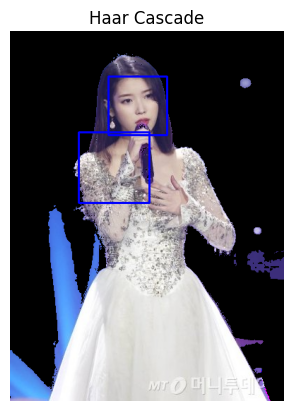

In [26]:
def detect_faces_haar(image_path, scaleFactor=1.1, minNeighbors=5):
    img = cv2.imread(image_path)
    if img is None:
        print("Failed to load image:", image_path)
        return
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Haar Cascade
    haar_xml = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
    face_cascade = cv2.CascadeClassifier(haar_xml)
    if face_cascade.empty():
        print("Haar cascade not found.")
        return

    faces = face_cascade.detectMultiScale(
        gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=(30,30)
    )
    print(f"Detected {len(faces)} faces (Haar)")
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Haar Cascade')
    plt.axis('off')
    plt.show()

# Test
detect_faces_haar(image_path, 1.1, 5)

## 4.3 LBP Cascade 검출
```python
lbp_cascade = cv2.CascadeClassifier('lbpcascade_frontalface_improved.xml')
faces = lbp_cascade.detectMultiScale(gray, 1.1, 5)
```

Detected 1 faces (LBP)


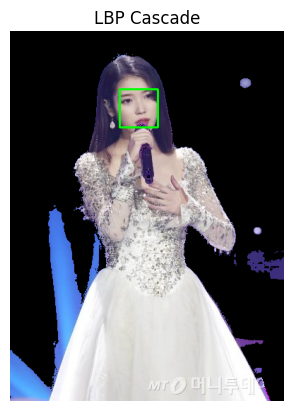

In [27]:
def detect_faces_lbp(image_path, scaleFactor=1.1, minNeighbors=5):
    img = cv2.imread(image_path)
    if img is None:
        print("Failed to load image:", image_path)
        return
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    lbp_xml = 'lbpcascade_frontalface_improved.xml'
    if not os.path.exists(lbp_xml):
        print("LBP XML not found. Download or check path.")
        return

    lbp_cascade = cv2.CascadeClassifier(lbp_xml)
    if lbp_cascade.empty():
        print("LBP cascade is empty.")
        return

    faces = lbp_cascade.detectMultiScale(
        gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors
    )
    print(f"Detected {len(faces)} faces (LBP)")
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('LBP Cascade')
    plt.axis('off')
    plt.show()

# Test
detect_faces_lbp(image_path, 1.1, 5)